<a href="https://colab.research.google.com/github/cuzmyk/machine_learning/blob/main/2s_2pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [14]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [15]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


#### 1.2. Проектируем архитектуру для этой задачи

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [17]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_n = mms.fit_transform(X_train)
X_test_n = mms.transform(X_test)

X_train_n.shape, X_test_n.shape

((404, 13), (102, 13))

In [18]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential([
    Dense(40, input_shape=(13,), activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 40)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [19]:
SPEED = 0.2

model.compile(optimizer=Adam(learning_rate=SPEED), loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [20]:
EPOCHS = 50

history = model.fit(X_train_n, y_train, epochs=EPOCHS, validation_data=(X_test_n, y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 333.5633 - mae: 15.1588 - val_loss: 89.7405 - val_mae: 6.6590
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 82.6874 - mae: 6.6603 - val_loss: 109.5682 - val_mae: 9.1497
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 75.7268 - mae: 6.8697 - val_loss: 55.2664 - val_mae: 5.0073
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 37.0011 - mae: 4.1418 - val_loss: 56.1459 - val_mae: 4.6871
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 32.5097 - mae: 4.2108 - val_loss: 39.0530 - val_mae: 4.2991
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.0147 - mae: 3.3317 - val_loss: 33.6433 - val_mae: 3.6642
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 15.1758 - mae: 2.7622 - val_loss: 31.1588 - val_mae: 3.5319
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 14.0686 - mae: 2.6313 - val_loss: 29.9949 - val_mae: 3.3328
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms

#### 1.6. Делаем предсказания на тестовых данных

In [21]:
preds = model.predict(X_test_n)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [22]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

3.0357038105235383

#### 1.8. Строим график обучения

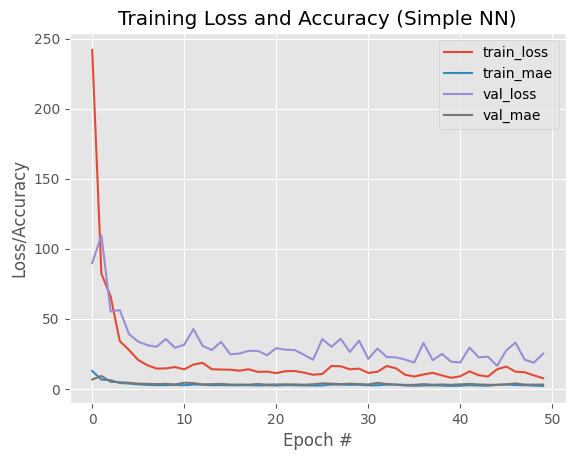

In [23]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["mae"], label="train_mae")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [24]:
def preprocess_input(features, scale_model="scaler.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [25]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [26]:
!pip install -q gradio

import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="Crime rate", minimum=0, maximum=100, step=0.1, value=8.6),
        gr.Slider(label="Land zoned", minimum=0, maximum=100, step=0.1, value=23.3),
        gr.Slider(label="Non-retail", minimum=0, maximum=50, step=0.1, value=6.8),
        gr.Slider(label="Charles River", minimum=0, maximum=1, step=0.1, value=0.25),
        gr.Slider(label="Nitric Oxides", minimum=0, maximum=1, step=0.1, value=0.11),
        gr.Slider(label="Average rooms", minimum=1, maximum=10, step=0.1, value=0.7),
        gr.Slider(label="Owner-occupied", minimum=1, maximum=100, step=0.1, value=28.1),
        gr.Slider(label="Distance center", minimum=0, maximum=15, step=0.1, value=2.1),
        gr.Slider(label="Radial highway", minimum=1, maximum=50, step=0.1, value=8.7),
        gr.Slider(label="tax-rate per 10k", minimum=100, maximum=1000, step=0.1, value=168.5),
        gr.Slider(label="Pupil-teacher rat.", minimum=1, maximum=50, step=0.1, value=2.1),
        gr.Slider(label="B", minimum=0, maximum=1000, step=0.1, value=91.3),
        gr.Slider(label="Lower status", minimum=1, maximum=50, step=0.1, value=7.2),
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4b759dc56f3c613e3d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://4b759dc56f3c613e3d.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [28]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [29]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.ru/d/WA8k7NGVrqm7hQ) -o arch.zip
! unzip -qq arch.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 95.5M  100 95.5M    0     0  15.9M      0  0:00:05  0:00:05 --:--:-- 23.5M


### 3. Указываем путь к набору данных:

In [30]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [31]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Vegetable Images/train")))

random.shuffle(imagePaths)

### 4. Загружаем набор данных и формируем общую выборку:

In [32]:
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [33]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [34]:
print(data)
print(labels)

[[0.35686275 0.54509804 0.40392157 ... 0.2        0.18431373 0.22745098]
 [0.16862745 0.15686275 0.1372549  ... 0.12941176 0.43137255 0.67843137]
 [0.36078431 0.38039216 0.37254902 ... 0.06666667 0.0627451  0.07843137]
 ...
 [0.1372549  0.1254902  0.10588235 ... 0.25882353 0.4627451  0.31764706]
 [0.15294118 0.1254902  0.15294118 ... 0.19215686 0.20392157 0.3254902 ]
 [0.04313725 0.02745098 0.02352941 ... 0.34901961 0.45098039 0.74901961]]
['Cucumber' 'Carrot' 'Cucumber' ... 'Carrot' 'Carrot' 'Carrot']


#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [35]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [36]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [37]:
model = Sequential()
model.add(Dense(2048, input_shape=(3072,), activation="relu"))
#model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [38]:
SPEED = 0.01
EPOCHS = 80

#### 5.3. Компилируем модель:

In [39]:
print("[INFO] training network...")
opt = SGD(learning_rate=SPEED)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [41]:
H = model.fit(trainX, trainY,
              validation_data=(testX, testY),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.5752 - loss: 0.9675 - val_accuracy: 0.8680 - val_loss: 0.5955
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.7947 - loss: 0.5967 - val_accuracy: 0.6693 - val_loss: 0.6231
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.8472 - loss: 0.4275 - val_accuracy: 0.9187 - val_loss: 0.3339
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.8912 - loss: 0.3369 - val_accuracy: 0.8307 - val_loss: 0.4368
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9146 - loss: 0.2937 - val_accuracy: 0.9360 - val_loss: 0.2390
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9304 - loss: 0.2286 - val_accuracy: 0.9213 - val_loss: 0.2535
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9335 - loss: 0.2278 - val_accuracy: 0.9493 - val_loss: 0.1901
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9417 - loss: 0.2009 - val_accuracy: 0.93

#### 6.3. Загружаем лучшую модель:

In [42]:
from keras.models import load_model

model = load_model("/content/best_model_3.keras")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [43]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

      Carrot       0.99      0.99      0.99       253
    Cucumber       1.00      0.99      0.99       237
      Radish       0.98      0.98      0.98       260

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



#### 7.2. Выведем матрицу ошибок

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


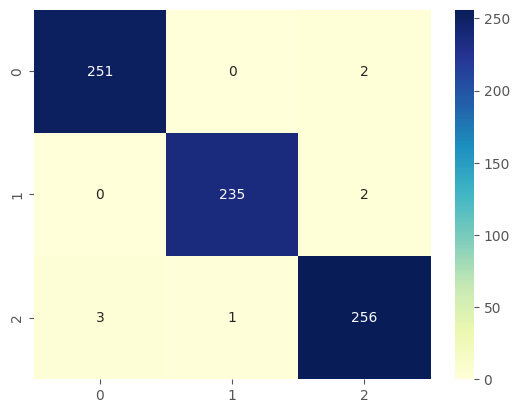

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

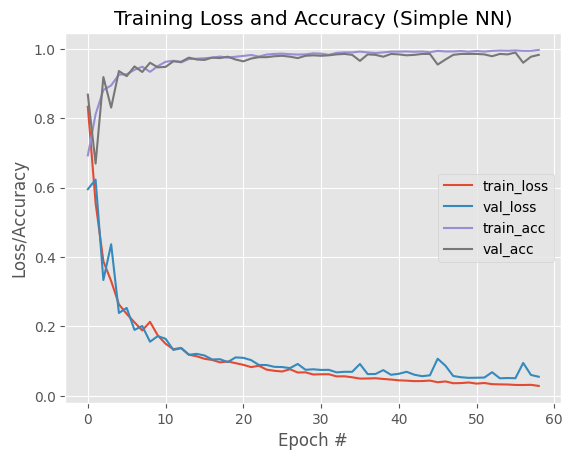

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем количество эпох для графика
N = np.arange(0, len(H.history["loss"]))  # Используем длину истории

# Строим графики
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")

# Проверяем наличие метрики "accuracy" или заменяем её на "mae"
if "accuracy" in H.history:
    plt.plot(N, H.history["accuracy"], label="train_acc")
    plt.plot(N, H.history["val_accuracy"], label="val_acc")
elif "mae" in H.history:
    plt.plot(N, H.history["mae"], label="train_mae")
    plt.plot(N, H.history["val_mae"], label="val_mae")

plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
plt.show()

### 8. Сохранение модели и меток классов:

In [47]:
def save_model_and_labels(model, lb, model_path = "model_3.h5", labels_path = "label_bin_3"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [48]:
model_path = "model_3.h5"
labels_path = "label_bin_3"

save_model_and_labels(model, lb, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [49]:
!pip install gradio

In [50]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2
import numpy as np

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [51]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    image = image[:, :, ::-1]                 # поменять каналы местами (RGB на BGR)
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [52]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/model_3.h5", label_path = "/content/label_bin_3"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [55]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Загрузите изображение"),
    outputs=gr.Label(num_top_classes=len(lb.classes_)),
    examples=[
        "/content/Vegetable Images/train/Carrot/0001.jpg",
        "/content/Vegetable Images/train/Cucumber/0001.jpg",
        "/content/Vegetable Images/train/Radish/0003.jpg"
    ]
)

# Запускаем интерфейс
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1f8d7f3d86af0ce11e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://cb3ab60484b926a7b8.gradio.live
Killing tunnel 127.0.0.1:7862 <> https://1f8d7f3d86af0ce11e.gradio.live


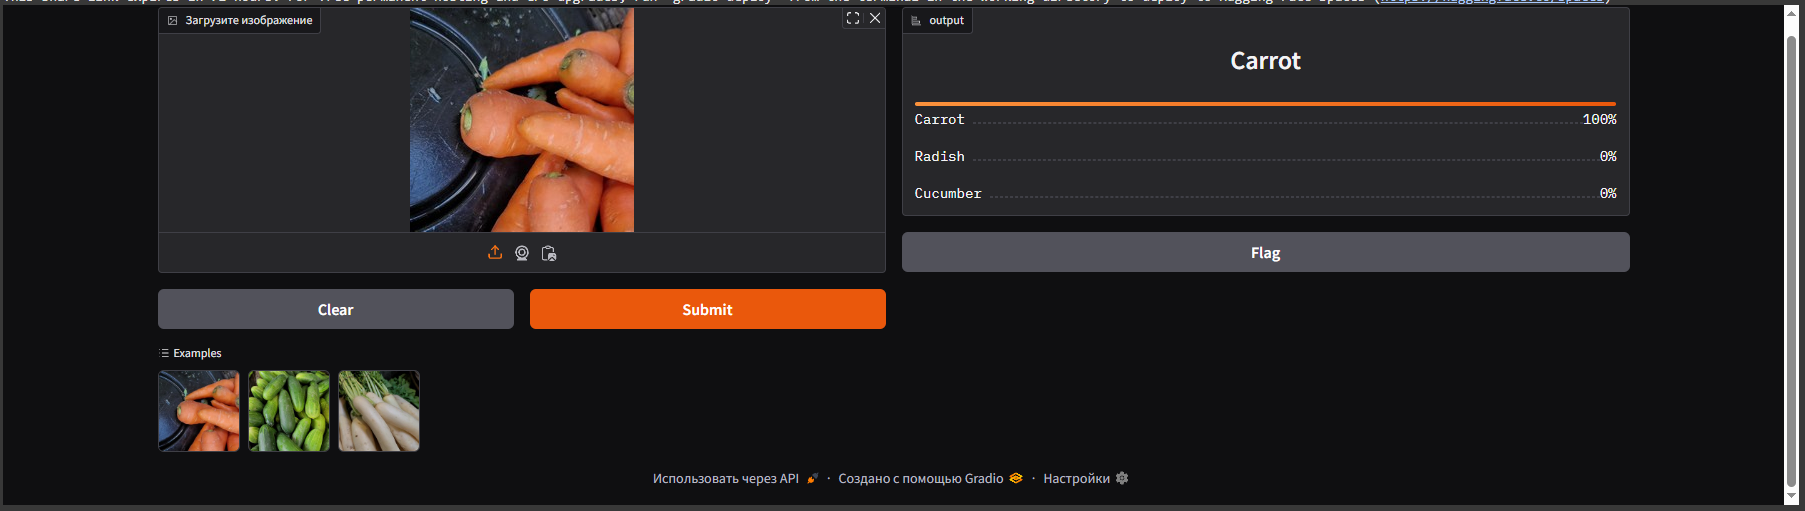